In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle 
import os
import logging
from collections import Counter
import unicodedata

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose

from cgpos.utils.util import import_pkl, export_pkl, is_greek

In [3]:
# Load hydra params
initialize("../conf", version_base=None)
config = compose(config_name='main')
# Init logger
logging.basicConfig(level=logging.INFO) 

In [4]:
# Load data
data = import_pkl(config.perseus.processed)

In [5]:
# Normalize
normalized_words = []
for word_dict in data:
    word = word_dict['form']
    word = unicodedata.normalize('NFD', word)  # Split letter from diacritics: ["ί"] becomes ["ι"," ́ "]
    word = ''.join([char for char in word if is_greek(char)]) # Drop non-Greek chars
    word_dict['normalized'] = word
    if word:
        normalized_words.append(word_dict['normalized'])

In [6]:
words_counter = Counter(normalized_words)
words_counter.most_common(20)

[('καὶ', 16003),
 ('δ̓', 10779),
 ('δὲ', 9734),
 ('τε', 5144),
 ('μὲν', 4384),
 ('τῶν', 4030),
 ('ἐν', 3964),
 ('τὴν', 3496),
 ('τὸν', 3248),
 ('γὰρ', 3125),
 ('οὐ', 3118),
 ('τὸ', 2668),
 ('οἱ', 2656),
 ('τῆς', 2246),
 ('δέ', 2216),
 ('ὡς', 2204),
 ('ὁ', 2159),
 ('τοὺς', 2115),
 ('τοῦ', 2020),
 ('τ̓', 1940)]

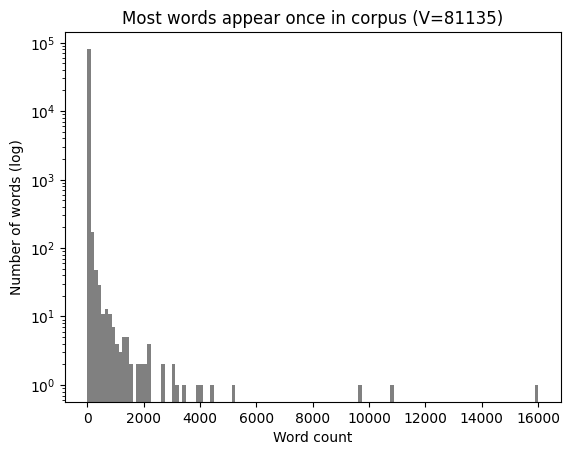

In [7]:
# Make hist
hist_values = np.fromiter(words_counter.values(), dtype=np.int32)
plt.hist(hist_values, bins=2**7, color='grey')
plt.yscale('log')
plt.title(f'Most words appear once in corpus (V={len(hist_values)})')
plt.xlabel('Word count')
plt.ylabel('Number of words (log)')
plt.show()

In [8]:
# Word frequency quantiles
np.quantile(hist_values, np.arange(0, 1, 0.1))

array([1., 1., 1., 1., 1., 1., 1., 2., 3., 6.])

In [9]:
# Export
export_pkl(data, config.perseus.normalized) 